In [101]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [102]:
SIZE = 500 # How many applicants to generate

genders = ["Man", "Woman"]
races = ["White", "Non-white"]
education_level = ["Ivy League", "Public University"]
birth_place = ["US Born", "Born outside of US"]

applicants = {"Name": [], "Gender": [], "Race": [], "Salary": [], "Age": [], "Education": [] , "Birth Region": []}


In [103]:
for i in range(SIZE):
    # Give each applicant a standard name indicating their number
    applicants["Name"].append("Applicant " + str(i + 1))
    # Give each applicant a random gender
    applicants["Gender"].append(random.choice(genders))
    # Give each applicant a random race
    applicants["Race"].append(random.choice(races))
    # Give each applicant an education
    applicants["Education"].append(random.choice(education_level))
    # Give each applicant an age
    applicants["Age"].append(random.randint(22,60))
    # Give each applicant a birth region
    applicants["Birth Region"].append(random.choice(birth_place))
    # Randomly generate a base salary for each applicant
    applicants["Salary"].append(random.randint(50000, 56000))

    # Here is where the bias ensues...

    if applicants["Gender"][i] == "Man":
        applicants["Salary"][i] *= 1.1
    else:
        applicants["Salary"][i] *= 0.95

    if applicants["Race"][i] == "White":
        applicants["Salary"][i] *= 1.1
    else:
        applicants["Salary"][i] *= 0.95

    if applicants["Education"][i] == "Ivy League":
        applicants["Salary"][i] *= 1.1
    else:
        applicants["Salary"][i] *= 0.95
    
   # if applicants["Age"][i] >= 40:
    applicants["Salary"][i] *= applicants["Age"][i] / 40
    #else:
        #applicants["Salary"][i] *= 0.95
    
    if applicants["Birth Region"][i] == "US Born":
        applicants["Salary"][i] *= 1.1
    else:
        applicants["Salary"][i] *= 0.95
    
    # Round the salary to 2 decimal places.
    applicants["Salary"][i] = round(applicants["Salary"][i], 2)
    



In [104]:
# Create an applicants.json and write the applicants into it
with open("applicants.json", "w") as outfile:
    json.dump(applicants, outfile)

# Create a dataframe using the json above
df = pd.read_json("applicants.json")

# Print the first few applicants
print(df.head())

          Name Gender       Race    Salary  Age          Education  \
0  Applicant 1    Man  Non-white  68120.36   52  Public University   
1  Applicant 2  Woman      White  84932.24   60  Public University   
2  Applicant 3  Woman      White  80383.87   47         Ivy League   
3  Applicant 4    Man  Non-white  53036.31   43  Public University   
4  Applicant 5  Woman  Non-white  52877.63   35         Ivy League   

         Birth Region  
0  Born outside of US  
1             US Born  
2             US Born  
3  Born outside of US  
4             US Born  


<h3> Line Plots </h3>
<p> * Age as x-axis </p>
<p> * Salary as y-axis </p>
<p> * Hue is all the other variables </p>

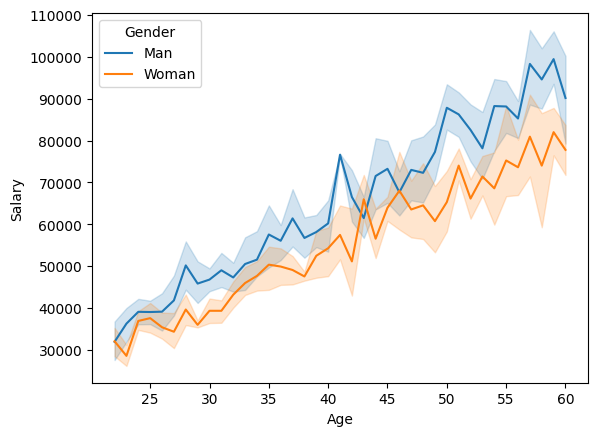

In [106]:
g = sns.lineplot(data=df, x="Age", y="Salary", hue="Gender")

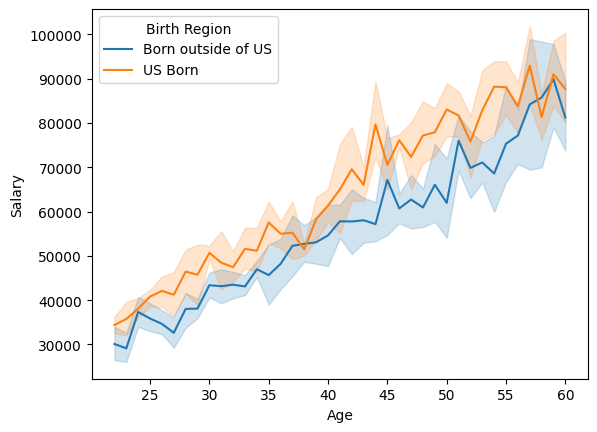

In [107]:
g = sns.lineplot(data=df, x="Age", y="Salary", hue="Birth Region")

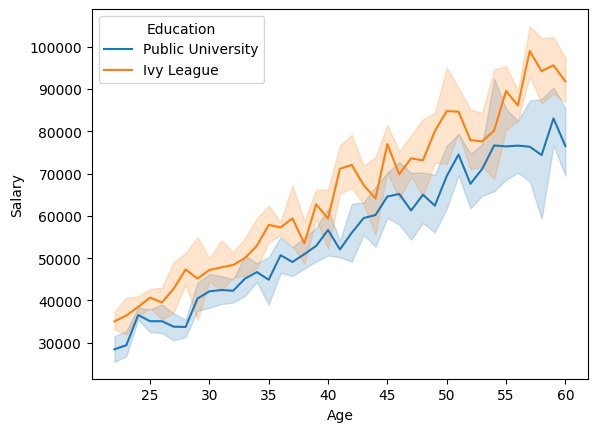

In [108]:
g = sns.lineplot(data=df, x="Age", y="Salary", hue="Education")

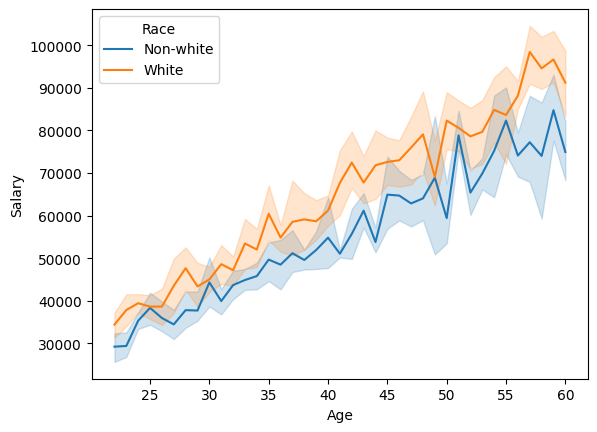

In [109]:
g = sns.lineplot(data=df, x="Age", y="Salary", hue="Race")

<h3> Bar Plots </h3>
<p> * Gender as x-axis </p>
<p> * Salary as y-axis </p>
<p> * Hue is all the other variables </p>

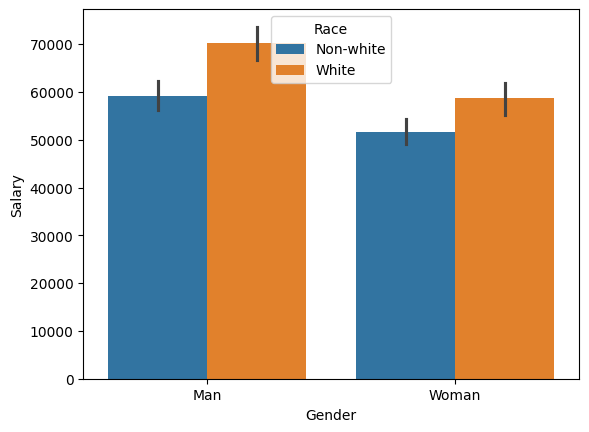

In [119]:
g = sns.barplot(data=df, x="Gender", y="Salary", hue="Race")

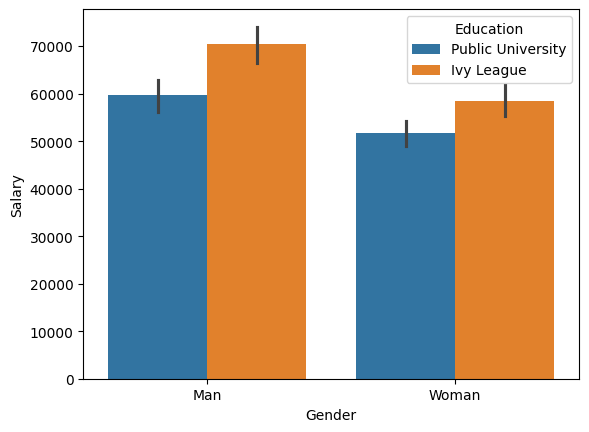

In [120]:
g = sns.barplot(data=df, x="Gender", y="Salary", hue="Education")

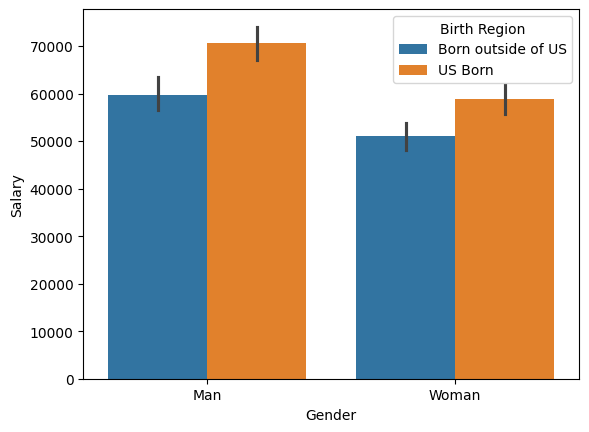

In [121]:
g = sns.barplot(data=df, x="Gender", y="Salary", hue="Birth Region")